In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from EM import em
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('haberman-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,Age,Op_year,axil_nodes
0,-0.987066,-0.135932,-0.084991
1,-0.923446,0.281903,-0.260341
2,-0.846824,-0.514674,-0.134166
3,-0.952356,0.304282,-0.020764
4,-0.727400,-0.611527,0.311326


In [5]:
n_clusters = 2
cluster_labels = em(n_clusters, df_normalized)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, cluster_labels)
silhouette_avg = silhouette_score(df_normalized, cluster_labels)
db_index = davies_bouldin_score(df_normalized, cluster_labels)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.40969838234755634
Calinski Harabasz Score: 198.08530466167488
Davies Bouldin Index: 0.9946767949931301


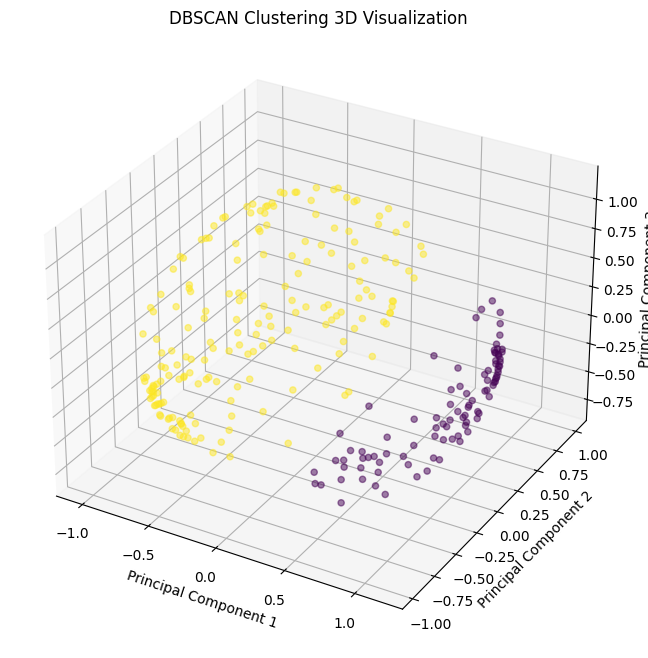

In [7]:
visualization(df_normalized, cluster_labels)

In [8]:
interactive_visualization(df_normalized, cluster_labels)